# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math
import os
from dotenv import load_dotenv

In [2]:
# API key setup
load_dotenv()

weather_api_key = os.getenv("API_KEY_OPEN_WEATHER")

In [3]:
# Import API key
# from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [49]:
city_name = pd.DataFrame(cities,columns=['Name'])
# city_name['Name'][0]
# cities[0]
city_name.tail()

,Name
593,kemijarvi
594,jalu
595,rexburg
596,mitu
597,colares


In [ ]:
len(city_name)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Build url for queries
base_url = "http://api.openweathermap.org/data/2.5/weather?"

max_set_size=50
max_set_number = math.ceil(len(cities) / max_set_size) # round up to nearest integer
print(max_set_number)

12


In [7]:
weather_api_key

'a7f7414ef848ef9ac3ce7eb8d4b647fb'

In [8]:
print("Beginning Data Retrieval")
print("-"*32)
set_number = 1
record = 1
data = []

for x in range(len(city_name)):
# for x in range(600,618):
    if record > 50:
        record = 1
        set_number += 1
    else:
        print(f"Processing Record {record} of Set {set_number} | #{x}, {city_name['Name'][x]}")
        query_url = f"{base_url}appid={weather_api_key}&q={city_name['Name'][x]}&units=imperial"
        weather = requests.get(query_url).json()
        data.append(weather)
        record += 1

print("-"*32)
print("Data Retrieval Complete")
print("-"*32)

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | arraial do cabo, #0
Processing Record 2 of Set 1 | vylgort, #1
Processing Record 3 of Set 1 | jamsa, #2
Processing Record 4 of Set 1 | busselton, #3
Processing Record 5 of Set 1 | abu samrah, #4
Processing Record 6 of Set 1 | belushya guba, #5
Processing Record 7 of Set 1 | ipixuna, #6
Processing Record 8 of Set 1 | horodyshche, #7
Processing Record 9 of Set 1 | mataura, #8
Processing Record 10 of Set 1 | talcahuano, #9
Processing Record 11 of Set 1 | bredasdorp, #10
Processing Record 12 of Set 1 | mahebourg, #11
Processing Record 13 of Set 1 | moerai, #12
Processing Record 14 of Set 1 | muli, #13
Processing Record 15 of Set 1 | barentsburg, #14
Processing Record 16 of Set 1 | thompson, #15
Processing Record 17 of Set 1 | diglur, #16
Processing Record 18 of Set 1 | georgetown, #17
Processing Record 19 of Set 1 | sao joao da barra, #18
Processing Record 20 of Set 1 | sentyabrskiy, #19
Processing Rec

Processing Record 27 of Set 4 | emba, #179
Processing Record 28 of Set 4 | gwadar, #180
Processing Record 29 of Set 4 | saldanha, #181
Processing Record 30 of Set 4 | nacala, #182
Processing Record 31 of Set 4 | muravlenko, #183
Processing Record 32 of Set 4 | khorramshahr, #184
Processing Record 33 of Set 4 | atka, #185
Processing Record 34 of Set 4 | vinh, #186
Processing Record 35 of Set 4 | puerto ayora, #187
Processing Record 36 of Set 4 | tautira, #188
Processing Record 37 of Set 4 | klaksvik, #189
Processing Record 38 of Set 4 | tasiilaq, #190
Processing Record 39 of Set 4 | sinnamary, #191
Processing Record 40 of Set 4 | diamantino, #192
Processing Record 41 of Set 4 | honiara, #193
Processing Record 42 of Set 4 | marsh harbour, #194
Processing Record 43 of Set 4 | rawson, #195
Processing Record 44 of Set 4 | tura, #196
Processing Record 45 of Set 4 | esna, #197
Processing Record 46 of Set 4 | berdigestyakh, #198
Processing Record 47 of Set 4 | ubeda, #199
Processing Record 48 

Processing Record 2 of Set 8 | castro, #358
Processing Record 3 of Set 8 | east retford, #359
Processing Record 4 of Set 8 | praia da vitoria, #360
Processing Record 5 of Set 8 | suez, #361
Processing Record 6 of Set 8 | udachnyy, #362
Processing Record 7 of Set 8 | chikoy, #363
Processing Record 8 of Set 8 | beyneu, #364
Processing Record 9 of Set 8 | pangdan, #365
Processing Record 10 of Set 8 | olinda, #366
Processing Record 11 of Set 8 | agua verde, #367
Processing Record 12 of Set 8 | dawlatabad, #368
Processing Record 13 of Set 8 | rutland, #369
Processing Record 14 of Set 8 | kulhudhuffushi, #370
Processing Record 15 of Set 8 | victoria, #371
Processing Record 16 of Set 8 | solsvik, #372
Processing Record 17 of Set 8 | wattegama, #373
Processing Record 18 of Set 8 | lagos, #374
Processing Record 19 of Set 8 | aklavik, #375
Processing Record 20 of Set 8 | namatanai, #376
Processing Record 21 of Set 8 | qasigiannguit, #377
Processing Record 22 of Set 8 | racine, #378
Processing Re

Processing Record 24 of Set 11 | byron bay, #533
Processing Record 25 of Set 11 | nouadhibou, #534
Processing Record 26 of Set 11 | camargo, #535
Processing Record 27 of Set 11 | itoman, #536
Processing Record 28 of Set 11 | gamba, #537
Processing Record 29 of Set 11 | takoradi, #538
Processing Record 30 of Set 11 | shingu, #539
Processing Record 31 of Set 11 | portland, #540
Processing Record 32 of Set 11 | samarai, #541
Processing Record 33 of Set 11 | atambua, #542
Processing Record 34 of Set 11 | orange, #543
Processing Record 35 of Set 11 | namtsy, #544
Processing Record 36 of Set 11 | tiarei, #545
Processing Record 37 of Set 11 | santo domingo, #546
Processing Record 38 of Set 11 | zachagansk, #547
Processing Record 39 of Set 11 | lahaina, #548
Processing Record 40 of Set 11 | halalo, #549
Processing Record 41 of Set 11 | kupang, #550
Processing Record 42 of Set 11 | ngunguru, #551
Processing Record 43 of Set 11 | santiago, #552
Processing Record 44 of Set 11 | dhidhdhoo, #553
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
import json

print(json.dumps(data,indent=4,sort_keys=True))

[
    {
        "base": "stations",
        "clouds": {
            "all": 0
        },
        "cod": 200,
        "coord": {
            "lat": -22.9661,
            "lon": -42.0278
        },
        "dt": 1629999833,
        "id": 3471451,
        "main": {
            "feels_like": 87.46,
            "humidity": 40,
            "pressure": 1008,
            "temp": 87.66,
            "temp_max": 87.76,
            "temp_min": 87.66
        },
        "name": "Arraial do Cabo",
        "sys": {
            "country": "BR",
            "id": 8326,
            "sunrise": 1629968645,
            "sunset": 1630010166,
            "type": 1
        },
        "timezone": -10800,
        "visibility": 10000,
        "weather": [
            {
                "description": "clear sky",
                "icon": "01d",
                "id": 800,
                "main": "Clear"
            }
        ],
        "wind": {
            "deg": 40,
            "speed": 23.02
        }
    },
    {

In [10]:
with open('data.json','w',encoding='utf-8') as f:
    json.dump(data,f,ensure_ascii=False,indent=4)
# obj = open('data.txt','wb')
# obj.write(data)
# obj.close

In [11]:
len(data)

587

In [17]:
from datetime import datetime # This is needed to get the timestamp for plotting purposes

dataframe = []

# for x in range(len(city_name)):
for x in range(len(data)):
    if data[x]['cod']=='404':
        dataframe.append([city_name['Name'][x]])
    else:
        dataframe.append([city_name['Name'][x],
                         data[x]['coord']['lat'],
                         data[x]['coord']['lon'],
                         data[x]['main']['temp_max'],
                         data[x]['main']['humidity'],
                         data[x]['clouds']['all'],
                         data[x]['wind']['speed'],
                         data[x]['sys']['country'],
                         data[x]['dt']])

df = pd.DataFrame(dataframe, columns =['Name','Latitude','Longitude',
                                       'Max_Temp','Humidity',
                                       'Cloudiness','Wind_Speed',
                                       'Country','Date'])
df_clean = df.dropna() # remove NaN values
df_clean = df_clean.reset_index(drop=True)
df_clean.to_csv('../output_data/weather_data.csv')
timestamp = datetime.now()
df_clean.head()
# df_clean.count()

,Name,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,87.76,40.0,0.0,23.02,BR,1.630000e+09
1,jamsa,61.8642,25.1900,56.14,80.0,93.0,11.07,FI,1.630000e+09
2,busselton,-33.6500,115.3333,47.08,51.0,58.0,17.13,AU,1.630000e+09
3,abu samrah,35.3029,37.1841,87.39,27.0,0.0,8.93,SY,1.630000e+09
4,ipixuna,-1.7625,-48.8043,85.95,51.0,94.0,4.99,BR,1.630000e+09


In [25]:
timestampstr = timestamp.strftime("%m/%d/%y")
timestampstr

'08/26/21'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

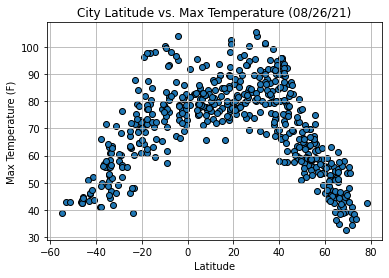

In [31]:
x = df_clean['Latitude']
y = df_clean['Max_Temp']
plt.title(f"City Latitude vs. Max Temperature ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

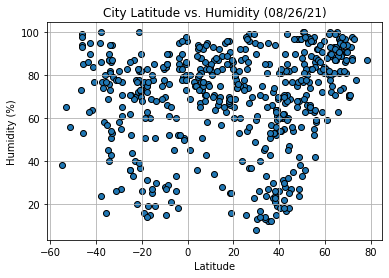

In [32]:
x = df_clean['Latitude']
y = df_clean['Humidity']
plt.title(f"City Latitude vs. Humidity ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/lat_v_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

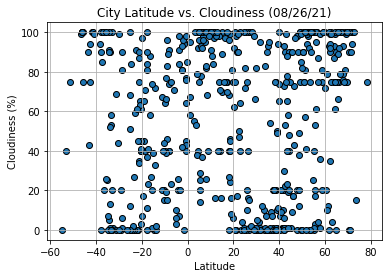

In [33]:
x = df_clean['Latitude']
y = df_clean['Cloudiness']
plt.title(f"City Latitude vs. Cloudiness ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/lat_v_cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

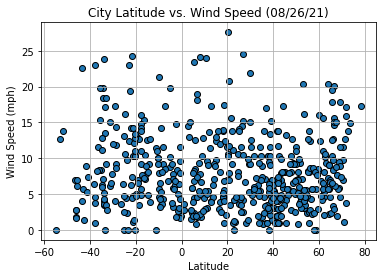

In [34]:
x = df_clean['Latitude']
y = df_clean['Wind_Speed']
plt.title(f"City Latitude vs. Wind Speed ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/lat_v_windspeed.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

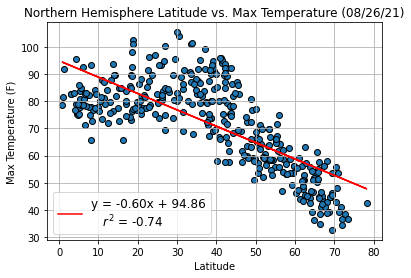

In [41]:
n_hem = df_clean[(df_clean.Latitude > 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = n_hem['Latitude']
y = n_hem['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Max Temperature ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/n_hem_lat_v_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

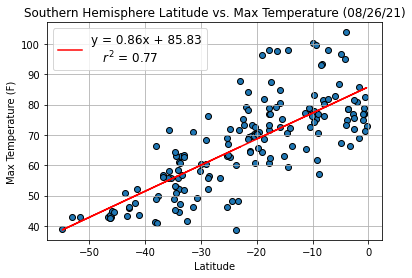

In [42]:
s_hem = df_clean[(df_clean.Latitude < 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = s_hem['Latitude']
y = s_hem['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Max Temperature ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/s_hem_lat_v_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

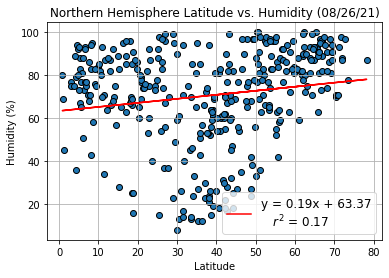

In [43]:
n_hem = df_clean[(df_clean.Latitude > 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = n_hem['Latitude']
y = n_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Humidity ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/n_hem_lat_v_humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

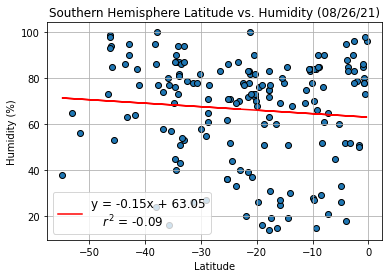

In [44]:
s_hem = df_clean[(df_clean.Latitude < 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = s_hem['Latitude']
y = s_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Humidity ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/s_hem_lat_v_humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

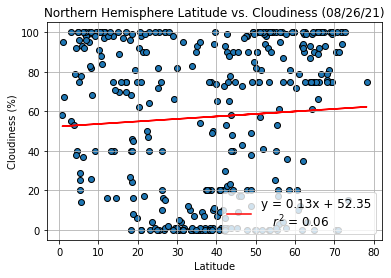

In [45]:
n_hem = df_clean[(df_clean.Latitude > 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = n_hem['Latitude']
y = n_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Cloudiness ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/n_hem_lat_v_cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

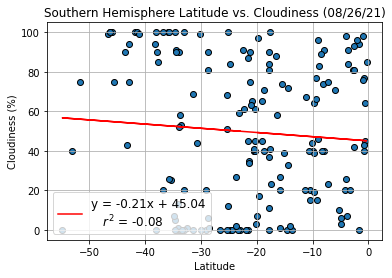

In [46]:
s_hem = df_clean[(df_clean.Latitude < 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = s_hem['Latitude']
y = s_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Cloudiness ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/s_hem_lat_v_cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

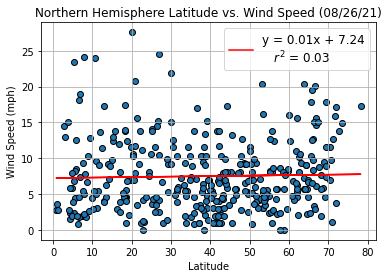

In [47]:
n_hem = df_clean[(df_clean.Latitude > 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = n_hem['Latitude']
y = n_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Wind Speed ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/n_hem_lat_v_windspeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

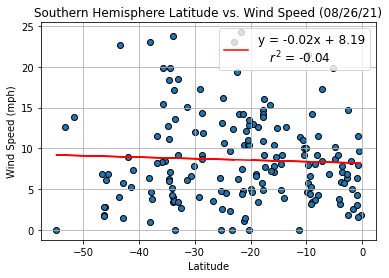

In [48]:
s_hem = df_clean[(df_clean.Latitude < 0)]
# n_hem = n_hem.sort_values(["Latitude"],ascending=False)

x = s_hem['Latitude']
y = s_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Wind Speed ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/s_hem_lat_v_windspeed.png')
plt.show()